# Version 3

- Inproved file input top bit
- Amended to save colour speciifc master and master photometry

# Version 4

- Made the display of the composite image nicer

- Reads in composite fits rather than use internal variable for Photomotry etc.
   
    
# Version 5

- Computes a weighted mean image DONE
- Computes a master saturation image. DONE
- Save files to a subfolder DONE
- Save photometry to a subfoler DONE
- Save file into to the master fits header? DONE

In [1]:
import numpy as np

import matplotlib
matplotlib.use('TkAgg')

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.optimize import curve_fit

from scipy import optimize
from astropy.time import Time

#from astropy.visualization import time_support
#from astropy.timeseries import TimeSeries

%matplotlib notebook 
import matplotlib.image as mpimg

import pandas as pd

from astropy.io import fits
from astropy.utils.data import download_file

import os
import glob
import time
from matplotlib.colors import LogNorm
from IPython import display
from IPython.display import clear_output

import random

%matplotlib inline
plt.rcParams.update({'font.size':13})

from astropy.stats import sigma_clipped_stats
from photutils.detection import DAOStarFinder
from photutils.aperture import CircularAperture
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize

from astropy import units as u
from photutils.aperture import CircularAperture, CircularAnnulus
from photutils.aperture import aperture_photometry
from photutils.aperture import ApertureStats

from astropy.wcs import WCS

# conda install -c astropy astroquery

from astroquery.astrometry_net import AstrometryNet

from astroquery.simbad import Simbad

import astropy.units as u
from astropy import coordinates

import pyvo as vo

from My_Functions_v3 import Find_stars_photometery_v4
from My_Functions_v3 import create_or_empty_folder
from My_Functions_v3 import update_fits_header

import warnings
warnings.filterwarnings('ignore')

import copy

In [41]:
main_star    = "V* RV UMa"
file_object  = "RV_Uma"
file_nights  = ["2022_03_20","2022_03_22","2022_03_24","2023_02_23","2023_04_03"]
save_star = file_object

In [2]:
main_star    = "V* RZ Cep"
file_object  = "RZ_Cep"
file_nights  = ["2022_12_07", "2023_01_23", "2023_02_23", "2023_11_10", "2024_01_07","2024_01_18"]

save_star = file_object

In [45]:
main_star    = "TYC 3023-1974-1"
file_object  = "tyc_3023-1974-1"
file_nights  = ["2023_04_02","2023_04_03"]

save_star = file_object

In [2]:
main_star    = "V* RZ Cas"
file_object  = "RZ_Cas"
file_nights  = ["2023_03_02","2023_04_06","2023_10_14","2023_11_30"]
#file_nights = ["2023_03_02","2023_04_06"]
#file_nights = ["2023_03_02","2023_04_06","2023_10_14"]
save_star = file_object

In [137]:
#colour_list = ["Luminance","Red","Green","Blue"]
colour_list = "Luminance"
colour_list = "Red"
colour_list = "Green"
colour_list = "Blue"

In [138]:
filepath_save = "../../BPO_Data/"+file_object+"/"

In [139]:
file_list_individual_csv = []
file_list_imag = []
file_list_sat = []
total_files = 0

filepath_master = "../../BPO_Data/"+file_object+"/"+colour_list+"/"
create_or_empty_folder(filepath_master)

for file_night in file_nights:
        
        filepath = "../../BPO_Data/"+file_object+"/"+file_night+"/Light/"+colour_list+"/"
        
        
        for file in glob.glob(filepath+"*.fits"):
            
            hdr_temp = fits.getheader(file)
            
            print(file)
            
            file_list_individual_csv.append(hdr_temp["PHOTFILE"])
            file_list_imag.append(hdr_temp["REDIMAGE"])
            file_list_sat.append(hdr_temp["SATIMAGE"])

print('total number of files = '+str(len(file_list_individual_csv)))
print(print("\n".join(file_list_individual_csv)))  

Folder '../../BPO_Data/RZ_Cas/Blue/' has been created.
../../BPO_Data/RZ_Cas/2023_03_02/Light/Blue\RZ_Cas_Light_Blue_0.600_secs_001.fits
../../BPO_Data/RZ_Cas/2023_03_02/Light/Blue\RZ_Cas_Light_Blue_0.600_secs_002.fits
../../BPO_Data/RZ_Cas/2023_03_02/Light/Blue\RZ_Cas_Light_Blue_0.600_secs_003.fits
../../BPO_Data/RZ_Cas/2023_03_02/Light/Blue\RZ_Cas_Light_Blue_0.600_secs_004.fits
../../BPO_Data/RZ_Cas/2023_03_02/Light/Blue\RZ_Cas_Light_Blue_0.600_secs_005.fits
../../BPO_Data/RZ_Cas/2023_03_02/Light/Blue\RZ_Cas_Light_Blue_0.600_secs_006.fits
../../BPO_Data/RZ_Cas/2023_03_02/Light/Blue\RZ_Cas_Light_Blue_0.600_secs_007.fits
../../BPO_Data/RZ_Cas/2023_03_02/Light/Blue\RZ_Cas_Light_Blue_0.600_secs_008.fits
../../BPO_Data/RZ_Cas/2023_03_02/Light/Blue\RZ_Cas_Light_Blue_0.600_secs_009.fits
../../BPO_Data/RZ_Cas/2023_03_02/Light/Blue\RZ_Cas_Light_Blue_0.600_secs_010.fits
../../BPO_Data/RZ_Cas/2023_03_02/Light/Blue\RZ_Cas_Light_Blue_0.600_secs_011.fits
../../BPO_Data/RZ_Cas/2023_04_06/Light/Blue

../../BPO_Data/RZ_Cas/2023_11_30/Light/Blue\RZ_Cas_Light_Blue_0.600_secs_012.fits
../../BPO_Data/RZ_Cas/2023_11_30/Light/Blue\RZ_Cas_Light_Blue_0.600_secs_013.fits
../../BPO_Data/RZ_Cas/2023_11_30/Light/Blue\RZ_Cas_Light_Blue_0.600_secs_014.fits
../../BPO_Data/RZ_Cas/2023_11_30/Light/Blue\RZ_Cas_Light_Blue_0.600_secs_015.fits
../../BPO_Data/RZ_Cas/2023_11_30/Light/Blue\RZ_Cas_Light_Blue_0.600_secs_016.fits
../../BPO_Data/RZ_Cas/2023_11_30/Light/Blue\RZ_Cas_Light_Blue_0.600_secs_017.fits
../../BPO_Data/RZ_Cas/2023_11_30/Light/Blue\RZ_Cas_Light_Blue_0.600_secs_018.fits
../../BPO_Data/RZ_Cas/2023_11_30/Light/Blue\RZ_Cas_Light_Blue_0.600_secs_019.fits
../../BPO_Data/RZ_Cas/2023_11_30/Light/Blue\RZ_Cas_Light_Blue_0.600_secs_020.fits
../../BPO_Data/RZ_Cas/2023_11_30/Light/Blue\RZ_Cas_Light_Blue_0.600_secs_021.fits
../../BPO_Data/RZ_Cas/2023_11_30/Light/Blue\RZ_Cas_Light_Blue_0.600_secs_022.fits
../../BPO_Data/RZ_Cas/2023_11_30/Light/Blue\RZ_Cas_Light_Blue_0.600_secs_023.fits
../../BPO_Data/R

Going to use [Astroalign](https://astroalign.quatrope.org/en/latest/) to get all the star lists in the same order, or soemthing like that.

In [140]:
 import astroalign as aa

Starts with the fist file and sees how many of the others can be sligned to it. If not all it goes to the next file until the end I guess- takes a while to run.

Make a new dataframe of row and columns of all the files, and then an entry of True or False is we can find a transform or not. Then perhaps we can spot bad files etc. Bit ugly. May have to seperate frames for each exposure? Using frames like arrays, naughtly but there you go.

In [141]:
aa_images = pd.DataFrame(file_list_individual_csv,columns = ["File_Name"])

i=0
for files in file_list_individual_csv:
    aa_images[files] = True
    aa_images[files][:i] = False
    i=i+1
    
aa_outcome = aa_images.copy()
aa_outcome[:][:] = False

In [142]:
matching_images = np.zeros(len(file_list_individual_csv))

i_target = 0
keep_going = 1



while keep_going == 1:
    
    file = file_list_individual_csv[i_target]

    counting_images = 0
    badfiles = []
    no_bad_files = 0
    good_images = 0
    
    df_target = pd.read_csv(file)
    target_file = file
    target = pd.concat([df_target['xcenter'],df_target['ycenter']], axis=1)
    
    transfs = []
    
    i=0
    for source_files in file_list_individual_csv:
    #for i in range(len(file_list)):
       # clear_output(wait=True)
        if aa_images[file][i] == True:
        
            try:
                    clear_output(wait=True)

                    print("Target file number = "+str(i+1)+", Source file number = "+str(i_target+1)+"/"+str(len(file_list_individual_csv))  +", number with no matches = "+str(no_bad_files))

                    print(target_file)
                    print(source_files)
                    df_source = pd.read_csv(source_files)
                    source =  pd.concat([df_source['xcenter'],df_source['ycenter']], axis=1)
                    transf, (source_list, target_list) = aa.find_transform(source,target,max_control_points=10)
                    transfs.append(transf)
                    plt.show()
                    time.sleep(0.01)

                    good_images = good_images + 1
                    
                    aa_outcome[file][i] = True
            except:
                    no_bad_files = no_bad_files + 1
                    badfiles.append(source_files)

            print("bad files")
            print(print("\n".join(badfiles))) 
            time.sleep(0.01)
            
        counting_images = np.sum(aa_outcome[file])+(aa_outcome.iloc[i_target] == True).sum(axis=0)
        
        if aa_outcome[file].iloc[i_target] == True:
            counting_images = counting_images - 1
        
        print("Counting Images = ",str(counting_images), ", Good images = ",str(good_images))
        i=i+1
        
    matching_images[i_target] = counting_images
    i_target = i_target + 1
    
    if counting_images == len(file_list_individual_csv) :
        keep_going = 0
        print("Finished and worked")
        i_target = i_target - 1
    
    if i_target  == len(file_list_individual_csv):
        keep_going = 0
        print("No file found for all the images, need to check what's going on")
          
    

Target file number = 150, Source file number = 1/150, number with no matches = 0
../../BPO_Data/RZ_Cas/2023_03_02/Light/Blue/photometry/RZ_Cas_Light_Blue_0.600_secs_001_photometry.csv
../../BPO_Data/RZ_Cas/2023_11_30/Light/Blue/photometry/RZ_Cas_Light_Blue_0.600_secs_050_photometry.csv
bad files

None
Counting Images =  150 , Good images =  150
Finished and worked


In [143]:
new_file_name = filepath_master+'counting_'+save_star+'_'+colour_list[0]+'.csv'

df_matching_images = pd.DataFrame(matching_images)

df_matching_images.to_csv(new_file_name)

In [144]:
new_file_name = filepath_master+'truth_table_'+save_star+'_'+colour_list[0]+'.csv'

aa_outcome.to_csv(new_file_name)

In [145]:
print(print("\n".join(file_list_imag)))

../../BPO_Data/RZ_Cas/2023_03_02/Light/Blue/reduced_images/RZ_Cas_Light_Blue_0.600_secs_001_reduced.fits
../../BPO_Data/RZ_Cas/2023_03_02/Light/Blue/reduced_images/RZ_Cas_Light_Blue_0.600_secs_002_reduced.fits
../../BPO_Data/RZ_Cas/2023_03_02/Light/Blue/reduced_images/RZ_Cas_Light_Blue_0.600_secs_003_reduced.fits
../../BPO_Data/RZ_Cas/2023_03_02/Light/Blue/reduced_images/RZ_Cas_Light_Blue_0.600_secs_004_reduced.fits
../../BPO_Data/RZ_Cas/2023_03_02/Light/Blue/reduced_images/RZ_Cas_Light_Blue_0.600_secs_005_reduced.fits
../../BPO_Data/RZ_Cas/2023_03_02/Light/Blue/reduced_images/RZ_Cas_Light_Blue_0.600_secs_006_reduced.fits
../../BPO_Data/RZ_Cas/2023_03_02/Light/Blue/reduced_images/RZ_Cas_Light_Blue_0.600_secs_007_reduced.fits
../../BPO_Data/RZ_Cas/2023_03_02/Light/Blue/reduced_images/RZ_Cas_Light_Blue_0.600_secs_008_reduced.fits
../../BPO_Data/RZ_Cas/2023_03_02/Light/Blue/reduced_images/RZ_Cas_Light_Blue_0.600_secs_009_reduced.fits
../../BPO_Data/RZ_Cas/2023_03_02/Light/Blue/reduced_ima

In [146]:
image_array = []
for file in file_list_imag:
    temp_image = fits.getdata(file)
    #temp_image2 = temp_image.newbyteorder()
    temp_image2 = np.array(temp_image, dtype="<f4")
    image_array.append(temp_image2)
    


In [147]:
sizes = np.shape(image_array)
sizes

(150, 1760, 2328)

In [148]:
sizes2 = np.shape(transfs)
sizes2

(150,)

Now we need to run the transf again, but this time on all the images in a list so we can use that for the actual image transforms.

In [149]:
file = file_list_individual_csv[i_target]

counting_images = 0
badfiles = []
no_bad_files = 0
good_images = 0
    
df_target = pd.read_csv(file)
target_file = file
target = pd.concat([df_target['xcenter'],df_target['ycenter']], axis=1)
    
transfs = []
    
for i in range(len(file_list_individual_csv)):

        
    try:
        clear_output(wait=True)

        print("Target file number = "+str(i+1)+", Source file number = "+str(i_target+1)+"/"+str(len(file_list_individual_csv))  +", number with no matches = "+str(no_bad_files))

        print(target_file)
        print(file_list_individual_csv[i])
        df_source = pd.read_csv(file_list_individual_csv[i])
        source =  pd.concat([df_source['xcenter'],df_source['ycenter']], axis=1)
        transf, (source_list, target_list) = aa.find_transform(source,target,max_control_points=10)
        transfs.append(transf)
        plt.show()
        time.sleep(0.01)

        good_images = good_images + 1
                    
        aa_outcome[file][i] = True
    except:
        no_bad_files = no_bad_files + 1
        badfiles.append(file_list_individual_csv[i])

    print("bad files")
    print(print("\n".join(badfiles))) 
    time.sleep(0.01)
            
counting_images = np.sum(aa_outcome[file])+(aa_outcome.iloc[i_target] == True).sum(axis=0)

Target file number = 150, Source file number = 1/150, number with no matches = 0
../../BPO_Data/RZ_Cas/2023_03_02/Light/Blue/photometry/RZ_Cas_Light_Blue_0.600_secs_001_photometry.csv
../../BPO_Data/RZ_Cas/2023_11_30/Light/Blue/photometry/RZ_Cas_Light_Blue_0.600_secs_050_photometry.csv
bad files

None


In [150]:
target= image_array[i_target]
#source= image_array[5]

image_array_registered = []

for i in range(len(file_list_individual_csv)):
    clear_output(wait=True)
    print(i)
    registered_image, footprint = aa.apply_transform(transfs[i], image_array[i],target,fill_value = np.median(image_array[i]))
    
 #   registered_image, footprint = aa.register(image_array[i],target)#, fill_value=-99999.99)

    image_array_registered.append(registered_image)
    time.sleep(0.01)

149


Bit too many large arrays in memory so lets delete this one.

In [151]:
image_array = []

In [152]:
median_image = np.median(image_array_registered,0)

First I'm going to make a master saturated image

In [153]:
master_saturated  = fits.getdata(file_list_imag[0]) * 0

for files in file_list_sat:

    temp_saturated = fits.getdata(files)
    master_saturated = master_saturated + temp_saturated
    
master_saturated_output = master_saturated > 0

In [154]:
master_saturated = []

In [155]:
sat_outfile = filepath_master+'Composite_'+save_star+'_'+colour_list[0]+'_saturated'+'.fits'

print(sat_outfile)

hdul = fits.open(file_list_imag[0])

image_hdr = hdul[0].header


hdul[0] = fits.PrimaryHDU(master_saturated_output.astype('int32'),image_hdr)


hdul.writeto(sat_outfile, overwrite=True)
hdul.close()


../../BPO_Data/RZ_Cas/Blue/Composite_RZ_Cas_B_saturated.fits


In [156]:
exposure_array = []
for file in file_list_imag:
    temp_hdr = fits.getheader(file)
    exposure_array.append(temp_hdr['EXPTIME'])

Instead of the stuff above we'll just ue the exposure time as the weight. If we do the facny stuff above then cosmic rayes etc. get artificialy weighted int the sum.

In [157]:
weight_array = image_array_registered
i = 0
mean_image = fits.getdata(file_list_imag[0]) * 0
total_weights = mean_image

for reduced_image in image_array_registered:
    clear_output(wait=True)
    E = exposure_array[i]
    
    temp_saturated = fits.getdata(file_list_sat[i])
    
#    weight_array.append(temp_saturated * E)
    weight_array[i] = temp_saturated * E
    mean_image = mean_image + reduced_image * weight_array[i]
    total_weights = total_weights +  weight_array[i]
    i=i+1
    print(i)
    time.sleep(0.01)
    

150


In [158]:
mean_image = mean_image / total_weights

In [159]:
median_image.shape

(1760, 2328)

In [160]:
my_cmap = copy.copy(matplotlib.cm.get_cmap('gray')) # copy the default cmap
my_cmap.set_bad((0,0,0))

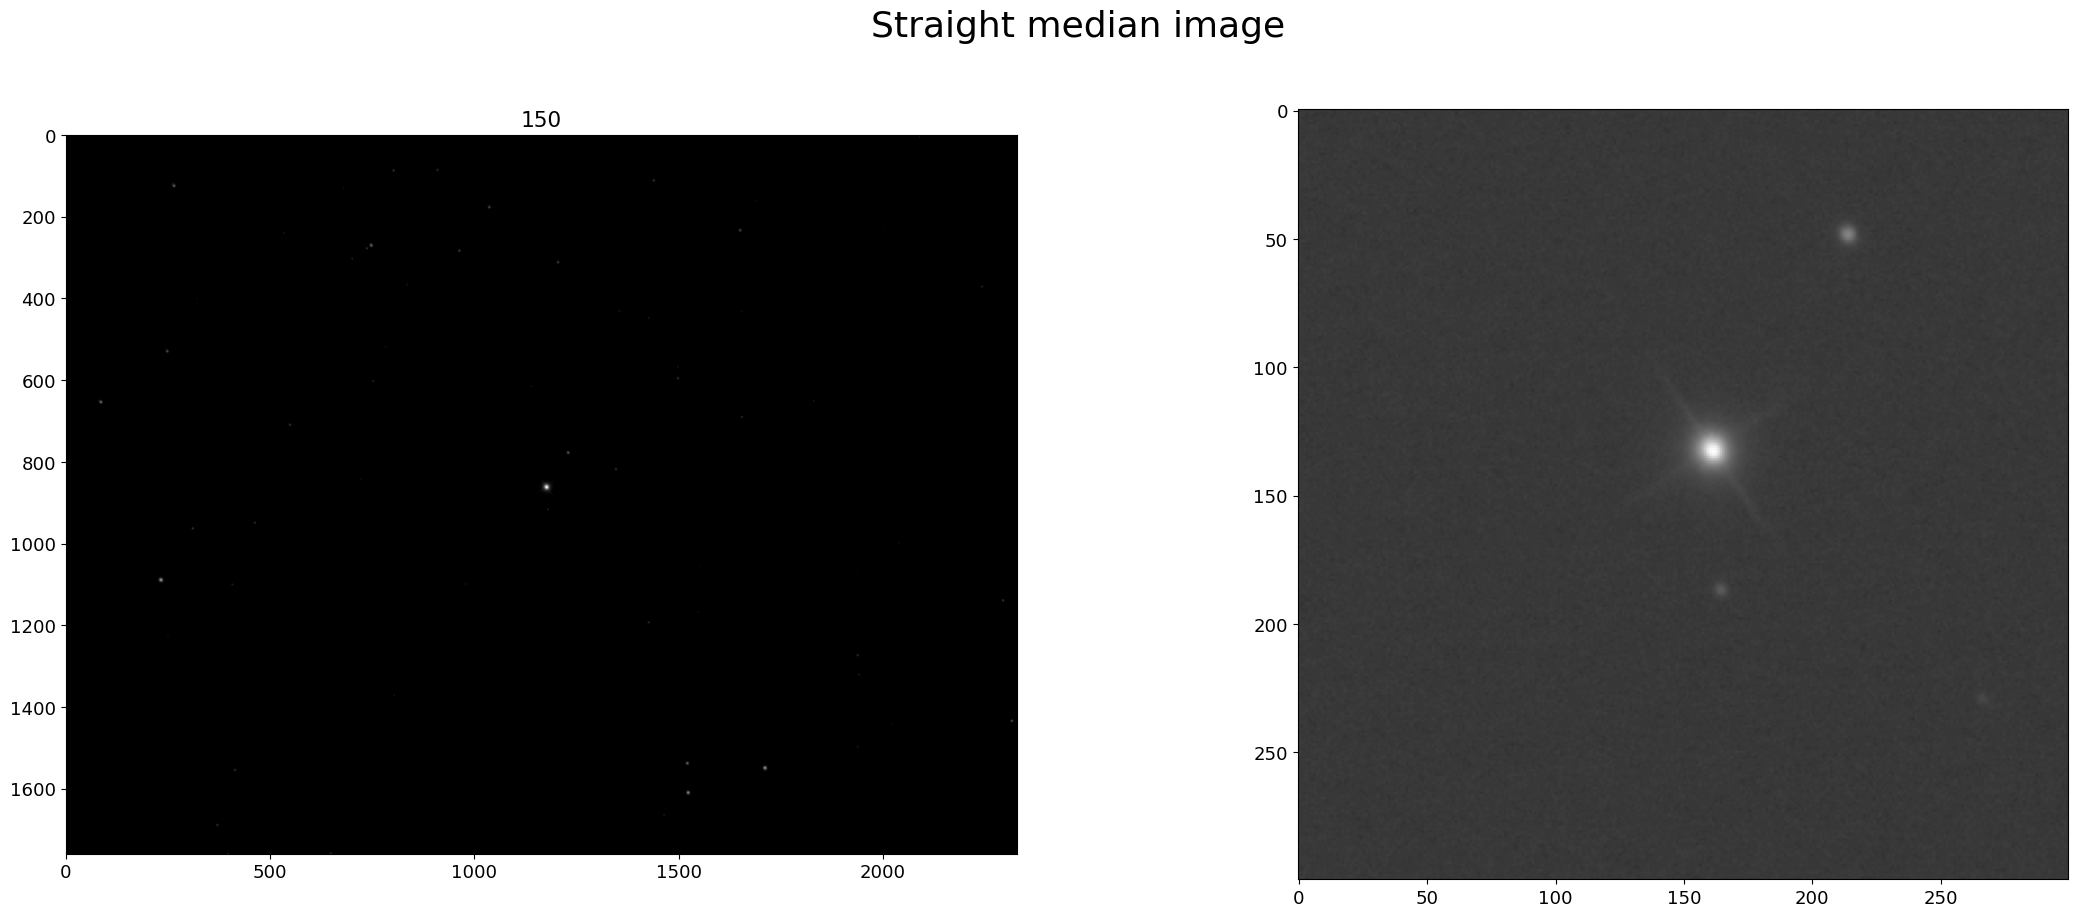

In [161]:
fig = plt.figure(figsize=(27,10))
fig.suptitle('Straight median image', fontsize=26)


#ax1.cla()
ax1 = plt.subplot(1,2,1)
ax1.imshow(median_image,cmap=my_cmap,norm=LogNorm(vmin=0.001*median_image.max(),vmax=1*median_image.max()))
ax1.set_title(i)

nopixels=150
sub_Image = median_image[int(sizes[1]/2-nopixels):int(sizes[1]/2+nopixels),int(sizes[2]/2-nopixels):int(sizes[2]/2+nopixels)]
ax2 = plt.subplot(1,2,2)
ax2.imshow(sub_Image,cmap=my_cmap,norm=LogNorm(vmin=1,vmax=1*sub_Image.max()))
plt.show()

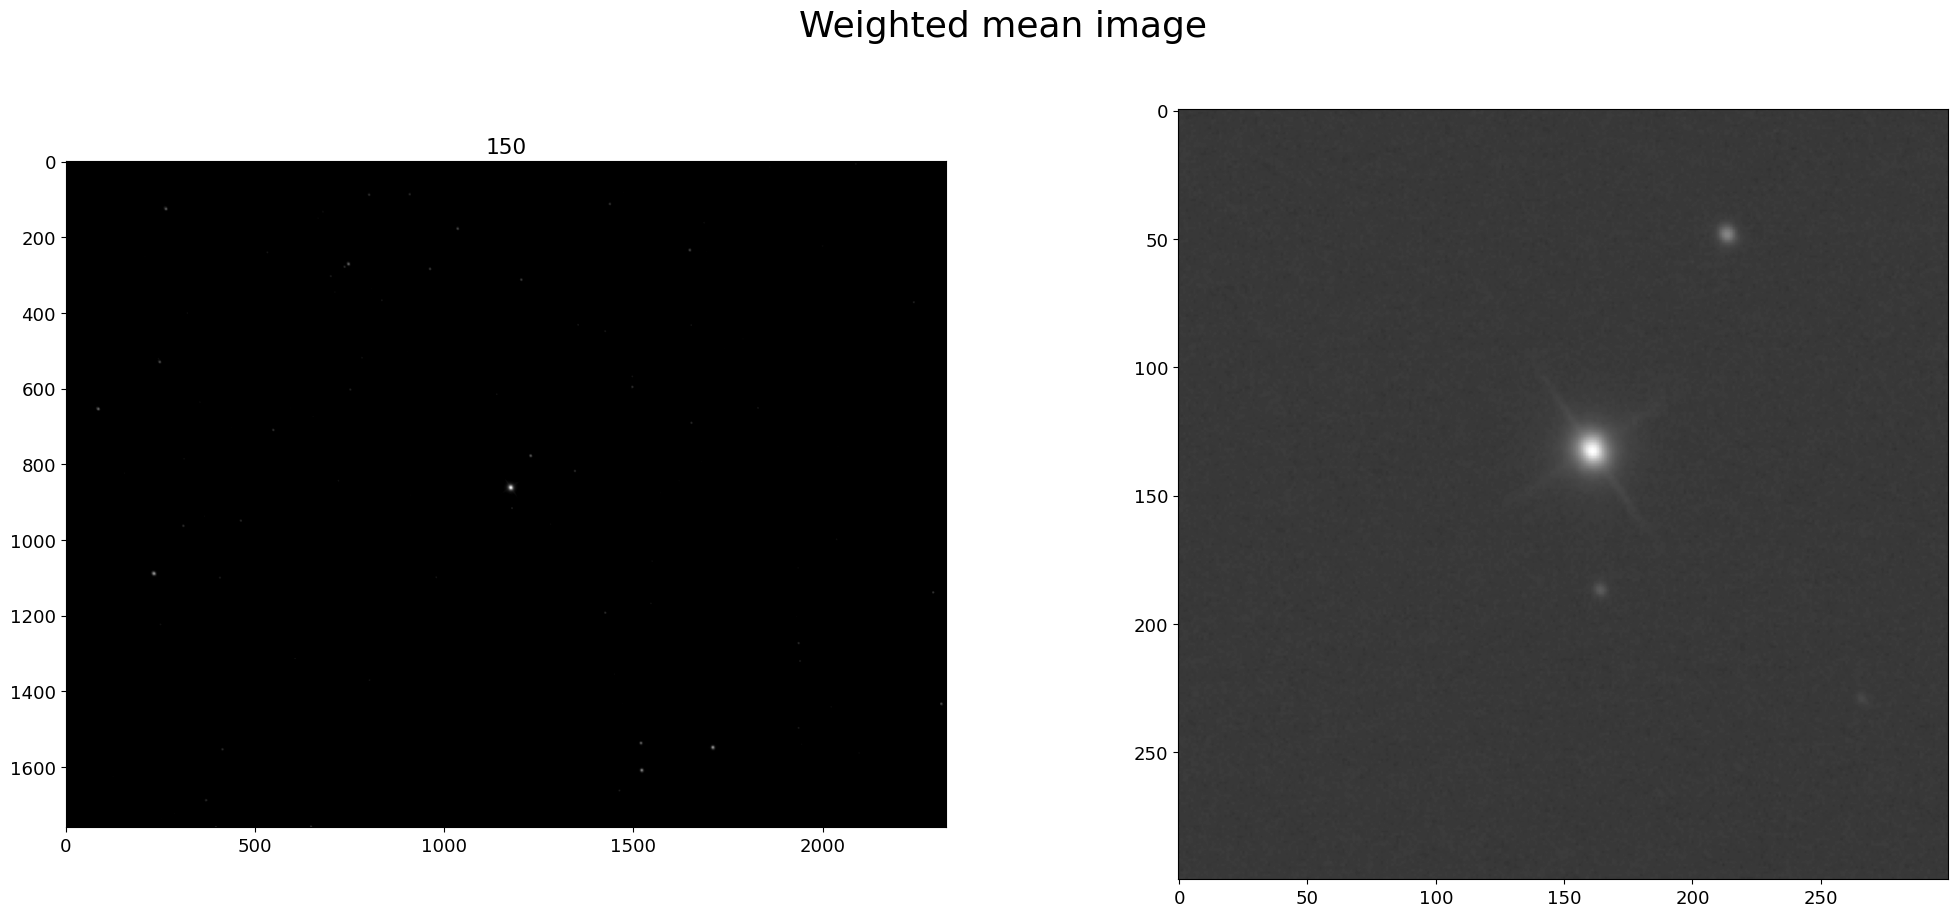

In [162]:
fig = plt.figure(figsize=(25,10))
fig.suptitle('Weighted mean image', fontsize=26)

ax1 = plt.subplot(1,2,1)
ax1.imshow(mean_image,cmap=my_cmap,norm=LogNorm(vmin=0.001*median_image.max(),vmax=1*median_image.max()))
ax1.set_title(i)

nopixels=150
sub_Image2 = mean_image[int(sizes[1]/2-nopixels):int(sizes[1]/2+nopixels),int(sizes[2]/2-nopixels):int(sizes[2]/2+nopixels)]
ax2 = plt.subplot(1,2,2)
ax2.imshow(sub_Image2,cmap=my_cmap,norm=LogNorm(vmin=1,vmax=1*sub_Image.max()))
plt.show()

-5.088008736494113 20.73251019328683


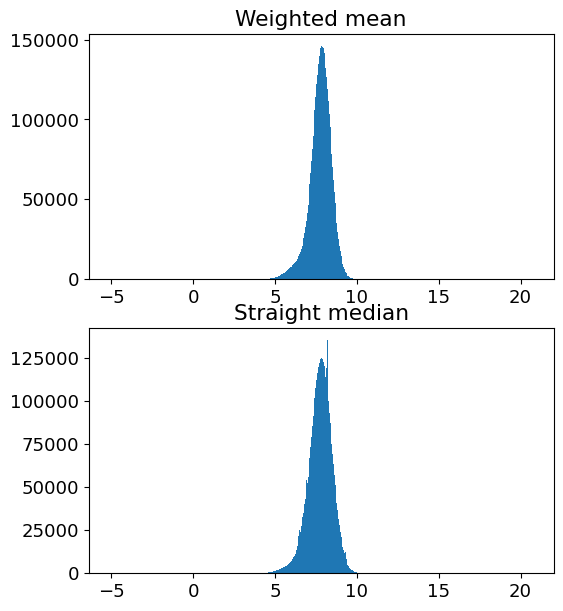

In [163]:
N_std = 1


fig = plt.figure(figsize=(6,7))
#ax1.cla()
ax1 = plt.subplot(2,1,1)
Vmin = np.nanmedian(mean_image) - N_std*np.nanstd(mean_image)
Vmax = Vmin + 2*N_std*np.nanstd(mean_image)
print(Vmin,Vmax)
ax1.hist(mean_image.flatten(),bins=500,range=(Vmin,Vmax))
ax1.set(title='Weighted mean')

ax2 = plt.subplot(2,1,2)
Vmin = np.nanmedian(mean_image) - N_std*np.nanstd(mean_image)
Vmax = Vmin + 2*N_std*np.nanstd(mean_image)
ax2.hist(median_image.flatten(),bins=500,range=(Vmin,Vmax))
ax2.set(title='Straight median')

plt.show()

In [164]:
outfile = filepath_master+'Composite_'+save_star+'_'+colour_list[0]+'_weighted_mean'+'.fits'

print(outfile)

image_hdr = []
image_hdr = fits.getheader(file_list_imag[0])

image_hdr['EXPTIME'] = np.mean(exposure_array)
image_hdr['SATIMAGE'] = sat_outfile
image_hdr['EXPTotal'] = np.sum(exposure_array)

print("Total exposure time = "+str(np.sum(exposure_array))+' s')


hdu = fits.PrimaryHDU(mean_image,image_hdr)
hdu.header['REDTIME'] = 1
hdu.writeto(outfile, overwrite=True)
#hdu.close()


../../BPO_Data/RZ_Cas/Blue/Composite_RZ_Cas_B_weighted_mean.fits
Total exposure time = 75.2 s


In [165]:
outfile = filepath_master+'Composite_'+save_star+'_'+colour_list[0]+'_median'+'.fits'

print(outfile)

image_hdr = []
image_hdr = fits.getheader(file_list_imag[0])

image_hdr['EXPTIME'] = np.mean(exposure_array)

hdu = fits.PrimaryHDU(median_image,image_hdr)
hdu.header['REDTIME'] = 1
hdu.writeto(outfile, overwrite=True)
#hdu.close()

../../BPO_Data/RZ_Cas/Blue/Composite_RZ_Cas_B_median.fits


# Star find and photometry

Now we'll find the stars, do photometry and send to astrometry.net and SIMBAD to identify the stars we can.

In [166]:
from My_Functions_v3 import Find_stars_photometery_v4

In [167]:
composite_image_file = filepath_master +'Composite_'+save_star+'_'+colour_list[0]+'_weighted_mean'+'.fits'

composite_image = fits.getdata(composite_image_file)
hduCOMP = fits.getheader(composite_image_file)

In [168]:
saturated_file = hduCOMP['SATIMAGE']

photometry_file = composite_image_file.replace('.fits', '_photometry.csv')

update_fits_header(composite_image_file, 'PHOTFILE', photometry_file, comment="Photometry csv")


In [169]:
df_photometry = Find_stars_photometery_v4(composite_image_file,200, 1.5,saturated_file,photometry_file)

Done 1st draft find, found 5 stars
Done 1st draft photometry
Old FWHM = 6.12 pixs
Old FWHM = 6.00 arcsec
New FWHM = 4.86 pixs
New FWHM = 4.76 arcsec
Done 2nd round find, found 100 stars
Number of saturated stars =  0
Done 2nd round photometry
../../BPO_Data/RZ_Cas/Blue/Composite_RZ_Cas_B_weighted_mean_photometry.csv


<Figure size 2500x2700 with 0 Axes>

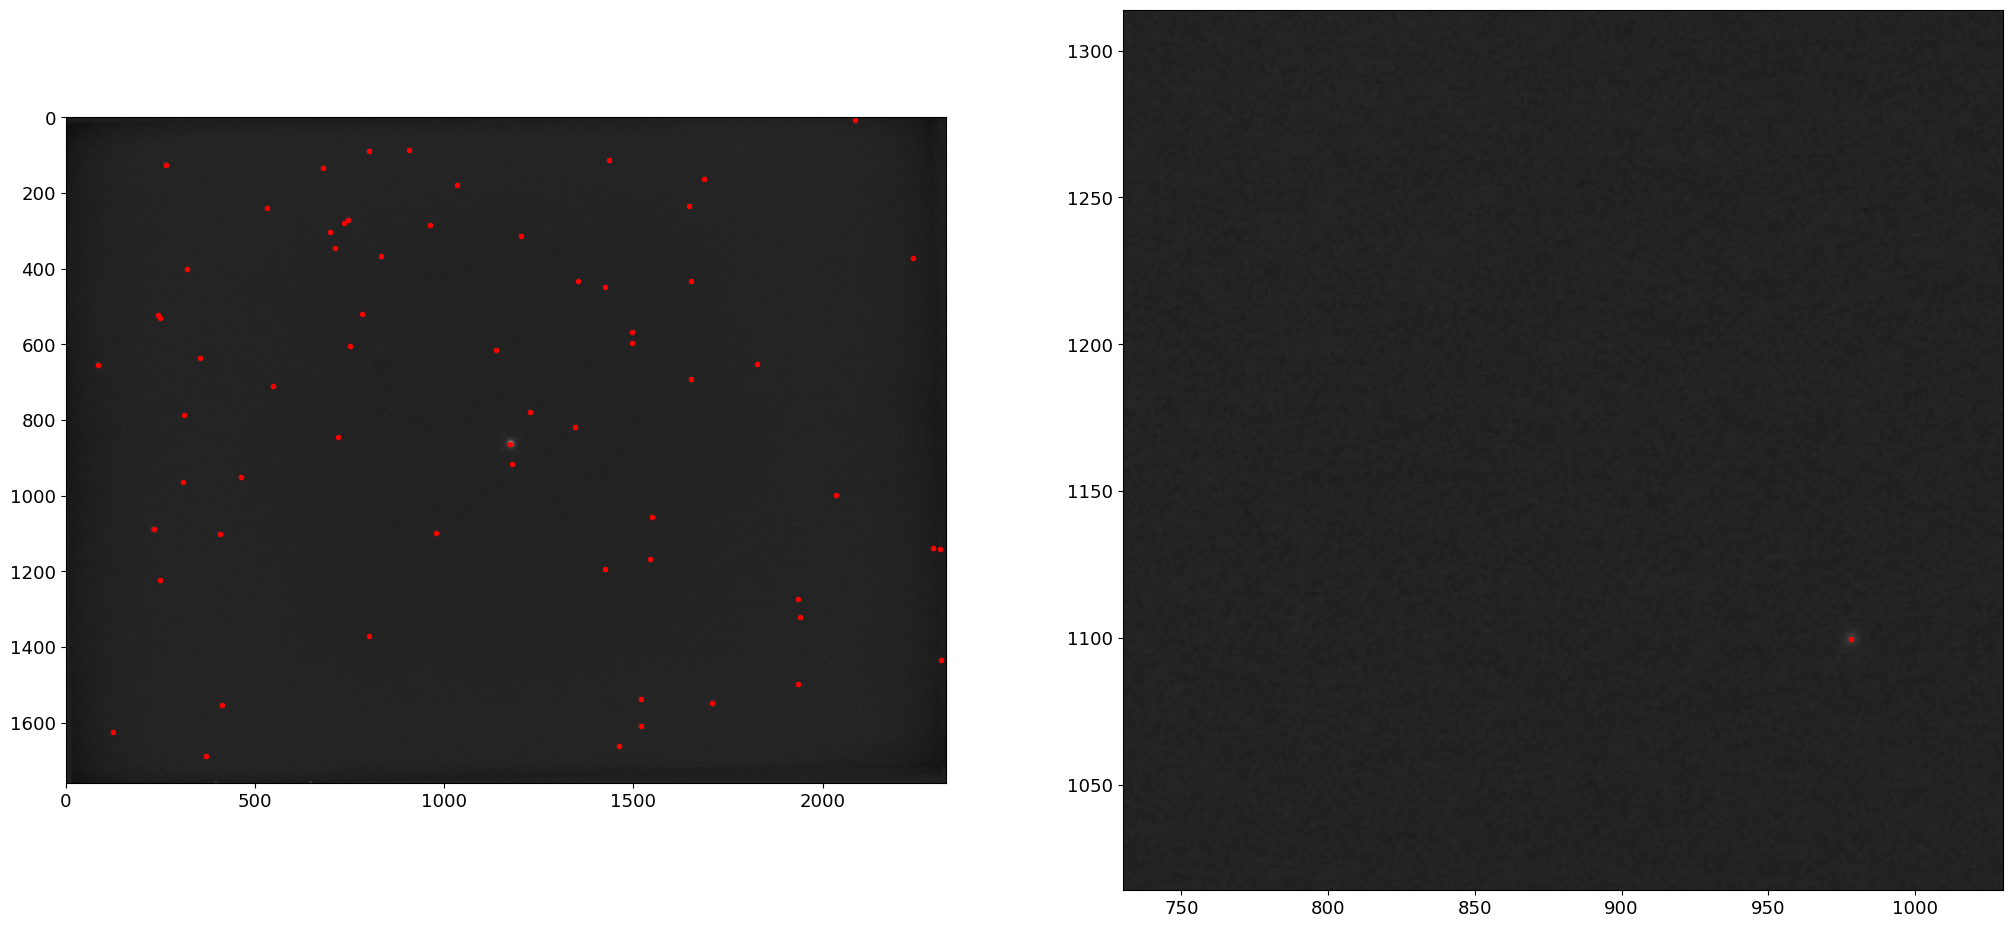

In [170]:
fig = plt.figure(figsize=(25,27))


fig = plt.figure(figsize=(25,27))
#ax1.cla()
ax1 = plt.subplot(1,2,1)
ax1.imshow(composite_image,cmap='gray',norm=LogNorm())
ax1.plot(df_photometry['xcenter'],df_photometry['ycenter'],'.r')

nopixels=150
ax2 = plt.subplot(1,2,2)
ax2.imshow(composite_image,cmap='gray'\
           ,norm=LogNorm())
ax2.set_xlim([int(composite_image.shape[0]/2-nopixels),int(composite_image.shape[0]/2+nopixels)])
ax2.set_ylim([int(composite_image.shape[1]/2-nopixels),int(composite_image.shape[1]/2+nopixels)])
ax2.plot(df_photometry['xcenter'],df_photometry['ycenter'],'.r')

plt.show()

In [171]:
ast = AstrometryNet()
ast.api_key = 'uktlwsvagbqfbbwl'

In [172]:
customSimbad = Simbad()
customSimbad.add_votable_fields('otype',
                                'flux(U)','flux(B)','flux(V)','flux(R)','flux(I)','flux(G)','flux(J)','flux(H)','flux(K)',
                                'flux(u)','flux(g)','flux(r)','flux(i)','flux(z)'
                                'ra(deg)','dec(deg)','ids')

main_star_results = customSimbad.query_object(main_star)

df_main_star_results = main_star_results.to_pandas()

main_star_RA = df_main_star_results['RA_deg'][0]
main_star_DEC = df_main_star_results['DEC_deg'][0]

In [173]:
composite_image = fits.getdata(composite_image_file)
composite_header = fits.getheader(composite_image_file)

In [174]:
image_width = composite_image.shape[1]
image_height = composite_image.shape[0]


wcs_header = ast.solve_from_source_list(df_photometry['xcenter'], df_photometry['ycenter'],
                                        image_width, image_height,
                                        solve_timeout=120,
                                        #scale_type='ul',
                                        scale_est = composite_header['SCALE'],
                                        scale_err = 5,
                                        #scale_lower = hdul[0].header['SCALE'] * 0.9,
                                        #scale_upper = hdul[0].header['SCALE'] * 1.1,
                                        scale_units = 'arcsecperpix',
                                        center_ra = main_star_RA,
                                        center_dec = main_star_DEC, 
                                        radius = (composite_header['SCALE'] * image_width)/3600
                                       )

Solving...

In [175]:
w = WCS(wcs_header)
print(w)

print('Done astrometry')

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 42.211149577  69.8047659718  
CRPIX : 559.578185504  719.670187443  
CD1_1 CD1_2  : -5.01288879792e-05  0.000265011673288  
CD2_1 CD2_2  : -0.000264915101281  -5.02169086518e-05  
NAXIS : 0  0
Done astrometry


In [176]:
new_file_name = composite_image_file.replace('.fits', '_photometry_solved.csv')
print(new_file_name)

update_fits_header(composite_image_file, 'PHOSOLVE', new_file_name, comment="Photometry solved csv")

# Opens, updates Header and closes and saves.
hdul = fits.open(composite_image_file, mode='update')
hdul[0].header.update(w.to_header(),'relax')
#hdul.close()

sky_all = w.pixel_to_world(df_photometry['xcenter'], df_photometry['ycenter'])
df_photometry['ra_from_astrometry_deg'] = sky_all.ra.degree
df_photometry['dec_from_astrometry_deg'] = sky_all.dec.degree

c = coordinates.SkyCoord(sky_all)
r = (1/5) * u.arcminute
result_table = customSimbad.query_region(c, radius=r)
df_results = result_table.to_pandas()

df_results_filtered = df_results.drop_duplicates('SCRIPT_NUMBER_ID')

df_photometry['SCRIPT_NUMBER_ID'] = df_photometry.index
df_photometry['SCRIPT_NUMBER_ID'] = df_photometry['SCRIPT_NUMBER_ID'] + 1

df_combined = pd.merge(df_photometry, df_results_filtered, on='SCRIPT_NUMBER_ID', how='left')

df_combined['File'] = composite_image_file




if sum(df_combined['MAIN_ID'] == main_star) == 0:
    print("No main star!")
else:
    print("Found main star")
    df_combined.to_csv(new_file_name)

../../BPO_Data/RZ_Cas/Blue/Composite_RZ_Cas_B_weighted_mean_photometry_solved.csv
Found main star


In [177]:
temp_hdr = fits.getheader(composite_image_file)

In [95]:
temp_hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2328                                                  
NAXIS2  =                 1760                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ROWORDER= 'TOP-DOWN'           / Row Order                                      
INSTRUME= 'ZWO CCD ASI1600MM Pro' / CCD Name                                    
TELESCOP= 'SynScan '           / Telescope name                                 
OBSERVER= 'Unknown '           / Observer name                                  
OBJECT  = 'RZ Cas  '           / Object name                                    
EXPTIME =                 1.